# Neural_network_two_layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import heapq
from nntl import pca, nntl
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from time import time
%matplotlib inline

In [3]:
#Load data
ti = time()
#data = np.loadtxt('feature.txt')
data = np.loadtxt('feature_300.txt',delimiter=',')
print time()-ti

414.350851059


In [4]:
print data.shape

(1179, 90001)


In [5]:
X = data[:,:-1]
y = data[:,-1]
y = y.astype(int)

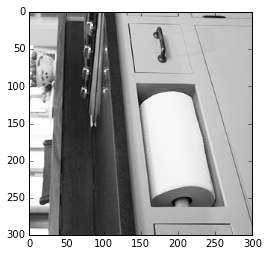

0


In [7]:
#Show a number
fig_n = 200
plt.imshow(X[fig_n,:].reshape(300,300), cmap="Greys_r")
plt.show()
print y[fig_n]


#print mnist.data.shape[0], np.shape(X_train)
#print mnist.target.shape
#print np.unique(mnist.target)
#print mnist.data.shape[1]

1.Preprocessing

In [8]:
#Check data distribution
y_dict = {}

for i in y:
    if y_dict.get(i) is None:
        y_dict[i] = 1
    else:
        y_dict[i] += 1

for key, value in y_dict.items():
    y_dict[key] = value / float(len(y))
    print '%d : %.3f' %(key, y_dict[key])


0 : 0.508
1 : 0.492


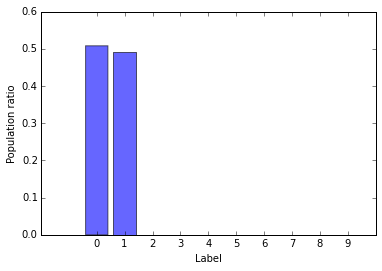

In [9]:
#Plot data distribution

bins = np.linspace(-0.5,9.5,num = 11)
plt.hist(y,bins,alpha=.6,normed = 1,rwidth = .8,label = 'Original ratings')
#plt.legend(loc='upper left')
plt.xlabel('Label')
plt.ylabel('Population ratio')
plt.xticks(np.linspace(0.0,9,num = 10))
plt.show()

In [10]:
#Normalization
X /= X.max()

#Zero mean
avg = np.mean(X,axis = 0)
X -=  avg


In [66]:
#print np.linspace(100,0,21)
for comp_num in np.linspace(100,0,21):
    pca = decomposition.PCA(n_components = int(comp_num))
    pca.fit(X)
    print pca.score(X)
    #pca.fit(X.T)
    #print pca.score(X.T)
    
#X = pca.transform(X)

459.516291849


KeyboardInterrupt: 

In [13]:
#plot pca percentage vs features
pca1 = pca()
f_num = np.linspace(1000,0,30).astype(int)
pca_per = [pca1.run(X,i)[0] for i in f_num]

plt.plot(f_num, pca_per)
plt.xlabel('Number of features')
plt.ylabel('Eigenvalue percentage of PCA')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'dummy'

In [ ]:
#PCA transformation
per, transmtx = pca1.run(X,500)
X = np.dot(transmtx.T, X.T)
X = X.T

In [11]:
#Partition into original train and test to compare with teammates. 
loc = range(len(y))
np.random.shuffle(loc)
X = X[loc,:]
y =  y[loc]

parti = 600
X_train, X_test = X[:parti], X[parti:]
y_train, y_test = y[:parti], y[parti:]


In [12]:
# initial condition for nntl
iter_times = 10000
layer_size = 10
reg_coeff = 0.001

In [13]:
# accu1: use train as train, test as tet
nntl1 = nntl(X_train, y_train, h_size = layer_size, reg = reg_coeff, niter = iter_times)
import time as ti
st = ti.time()
nntl1.model()
print ti.time()-st

y_tepd = nntl1.predict(X_test[:,:])
acc1 = nntl1.accuracy(y_test[0:],y_tepd)
print acc1

dnn.py:62: RuntimeWarning: overflow encountered in exp
  grads = {}
dnn.py:63: RuntimeWarning: invalid value encountered in divide
  dscores = probs
dnn.py:64: RuntimeWarning: divide by zero encountered in log
  dscores[range(self.ndata),self.Y] -= 1
dnn.py:89: RuntimeWarning: invalid value encountered in less_equal
  wt = self.wt


iteration: 0, loss: 0.888835
iteration: 100, loss: nan


ERROR: An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 12))



KeyboardInterrupt: 

In [18]:
print confusion_matrix(y_test,y_tepd)

[[203  87]
 [ 80 209]]


In [16]:
# accu2: use train as test, test as train
nntl2 = nntl(X_test, y_test, h_size = layer_size, reg = reg_coeff, niter = iter_times)
import time as ti
st = ti.time()
nntl2.model()
print ti.time()-st

y_trpd = nntl2.predict(X_train[:,:])
acc2 = nntl2.accuracy(y_train[0:],y_trpd)
print acc2


iteration: 0, loss: 0.734218
iteration: 100, loss: 0.322478


KeyboardInterrupt: 

In [20]:
print confusion_matrix(y_train,y_trpd)

[[215  94]
 [124 167]]


In [14]:
# 2-fold average accuracy
print 'average accuracy: %.4f' %(100*(acc1+acc2)/2.), '%'

average accuracy: 67.4119 %
